## Data preprocessing - Prepare data input for model

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_json('data.json', lines=True)

In [4]:
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,U.S. NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",U.S. NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets-cats-dogs-september-17-23_n_632de332e4b0695c1d81dc02,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,"""Until you have a dog you don't understand what could be eaten.""",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parenting-tweets_l_632d7d15e4b0d12b5403e479,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-loses-discrimination-lawsuit-franklin-templeton_n_632c6463e4b09d8701bd227e,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,U.S. NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.,Nina Golgowski,2022-09-22


In [8]:
# Combine headline and description
data['text'] = data['headline'] + ' [SEP] ' + data['short_description']
    
# Convert categories to numerical labels
label_map = {cat: idx for idx, cat in enumerate(data['category'].unique())}
data['label'] = data['category'].map(label_map)

In [9]:
df = data['text']
df.shape

(209527,)

In [10]:
df[:5]

0                      Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters [SEP] Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.
1    American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video [SEP] He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.
2                                                                                                                       23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23) [SEP] "Until you have a dog you don't understand what could be eaten."
3                                     The Funniest Tweets From Parents This Week (Sept. 17-23) [SEP] "Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with 

In [11]:
docs = df.tolist()

## Topic Modeling - 3 steps - Define, Fit-transform, review the output

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic()

In [14]:
topics, probs = topic_model.fit_transform(docs)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitl

In [15]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,101053,-1_my_and_her_we,"[my, and, her, we, that, was, in, to, of, sep]","[12 Crucial Life Lessons We All Need to Remember [SEP] Your present circumstances have already happened. You don't have to like them, but you have to accept them -- otherwise you are wasting your energy fighting a no-win battle against what is, instead of saving your energy to put towards making big life changes., North Carolina Republicans May Want To Pack The State Supreme Court, But They Probably Won't Do It [SEP] Republican officials say they have no plans to do so, but Democrats in the state are still on their guard., Bernie Sanders Won't Say Whether He Will Share His Email List With Democrats [SEP] ""Our job right now is to build the progressive movement. And we are making some pretty good success.""]"
1,0,1313,0_wedding_weddings_brides_bride,"[wedding, weddings, brides, bride, planning, proposal, couples, married, groom, grooms]","[Real Weddings: Couples Who Got Married This Weekend [SEP] Our readers attended weddings all over the U.S. this weekend, and one gorgeous couple tied the knot in the U.K.! Click through, Facebook Wedding: Brides Magazine Asks Social Network Users To Plan Big Day [SEP] Keep in touch! Check out HuffPost Weddings on Facebook, Twitter and Pinterest. Each week, new wedding options will be revealed, White House Weddings: First Couples On Their Wedding Days (PHOTOS) [SEP] Just as wedding season is coming to an end, election season is beginning. To kick off election season HuffPost Weddings style]"
2,1,1216,1_obamacare_insurance_repeal_care,"[obamacare, insurance, repeal, care, medicaid, health, affordable, aca, medicare, republicans]","[Obamacare Repeal Could Be More Difficult Than House Republicans Think [SEP] But it was so easy when you knew the president would never sign it!, A Republican Senate Can't Repeal Obamacare. That Won't Stop Them From Trying [SEP] , Great News For Obamacare [SEP] ]"
3,2,1035,2_police_suspect_shooting_officer,"[police, suspect, shooting, officer, shot, cop, fatally, cops, officers, killed]","[Ferguson Police Officer Shot [SEP] , Georgia Police Officers Both Die After Shooting Near College [SEP] The suspect killed himself inside a home after a standoff with police., Road-Rage Shooting Leaves 3-Year-Old Boy Dead, Suspect At Large: Cops [SEP] The child was sitting in the back of his grandmother's vehicle when he was fatally shot, police said.]"
4,3,988,3_women_gender_feminism_womens,"[women, gender, feminism, womens, feminist, female, gap, men, equality, stem]","[Feminism Is More Than What Young Hollywood Thinks About It [SEP] Young women talking about feminism is important. But focusing only on which young, famous women embrace or reject the label of ""feminist"" essentially reduces the issue of equal rights to a hashtag., How 2014 Was A Bad Year For Women But A Good Year For Feminism [SEP] , Who Needs Feminism Anyway? [SEP] Ultimately, it's time to redefine the word ""feminist"" and what it actually means. Because the truth is, we all need feminism. Only once being a feminist becomes the norm and not the exception, will we finally be able to make true, structural progress toward gender equality.]"
...,...,...,...,...,...
1946,1945,10,1945_rashida_baglike_naomi_tilda,"[rashida, baglike, naomi, tilda, penelope, gilmores, perfectlywrapped, versace, jones, eyeful]","[Naomi Campbell's Versace Runway Appearance Proves The Model Defies Time (PHOTOS) [SEP] ...and again in 1992: Naomi walking Versace yesterday... If anyone knows how to start a high fashion party, it's Naomi Campbell, Rashida Jones Shows Us How To Wear An Oversized Blazer (PHOTO) [SEP] Pacific Coast News WHO: ""Celeste and Jesse Forever"" star Rashida Jones Click here to see Rashida Jones' style evolution. WHAT, Rashida Jones Takes Her Style Very Seriously (PHOTO) [SEP] Just check out this outfit.]"
1947,1946,10,1946_convos_2yearold_episode_plumping,"[convos, 2yearold, episode, plumping

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Document</th>
      <th>Topic</th>
      <th>Name</th>
      <th>Representation</th>
      <th>Representative_Docs</th>
      <th>Top_n_words</th>
      <th>Probability</th>
      <th>Representative_document</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23) [SEP] "Until you have a dog you don't understand what could be eaten."</td>
      <td>4</td>
      <td>4_funniest_tweets_cat_women</td>
      <td>[funniest, tweets, cat, women, cats, twitter, hilarious, tweet, parenting, moms]</td>
      <td>[The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] ]</td>
      <td>funniest - tweets - cat - women - cats - twitter - hilarious - tweet - parenting - moms</td>
      <td>1.000000</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>The Funniest Tweets From Parents This Week (Sept. 17-23) [SEP] "Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce."</td>
      <td>4</td>
      <td>4_funniest_tweets_cat_women</td>
      <td>[funniest, tweets, cat, women, cats, twitter, hilarious, tweet, parenting, moms]</td>
      <td>[The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] ]</td>
      <td>funniest - tweets - cat - women - cats - twitter - hilarious - tweet - parenting - moms</td>
      <td>0.055122</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>How A New Documentary Captures The Complexity Of Being A Child Of Immigrants [SEP] In "Mija," director Isabel Castro combined music documentaries with the style of "Euphoria" and "Clueless" to tell a more nuanced immigration story.</td>
      <td>0</td>
      <td>0_fashion_taylor_dress_miley</td>
      <td>[fashion, taylor, dress, miley, cyrus, photo, beauty, swift, wear, shoes]</td>
      <td>[Marc Jacobs Turns 50: A Look Back At The Designer Before He Was An Icon (PHOTO) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do, Out Of Everything We Saw At New York Fashion Week, THIS Is What We Want [SEP] , Jessica Lange Golden Globes Dress 2013: See Her Red Carpet Look! (PHOTO) [SEP] See all of the looks from the 2013 Golden Globes red carpet! Want more? Be sure to check out HuffPost Style on Twitter, Facebook]</td>
      <td>fashion - taylor - dress - miley - cyrus - photo - beauty - swift - wear - shoes</td>
      <td>0.140561</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Golden Globes Returning To NBC In January After Year Off-Air [SEP] For the past 18 months, Hollywood has effectively boycotted the Globes after reports that the HFPA’s 87 members of non-American journalists included no Black members.</td>
      <td>1</td>
      <td>1_trump_colbert_stephen_jimmy</td>
      <td>[trump, colbert, stephen, jimmy, donald, netflix, thrones, kimmel, office, jon]</td>
      <td>[Stephen Colbert Does Some Porn Star Math For Michael Cohen And Donald Trump [SEP] The "Late Show" host runs the numbers., Stephen Colbert Suggests The Perfect Place For Donald Trump To Testify Under Oath [SEP] It's "to make sure Trump is honest," says Colbert., Stephen Colbert Teases New 'Our Cartoon President' TV Show About Donald Trump [SEP] "No one is safe."]</td>
      <td>trump - colbert - stephen - jimmy - donald - netflix - thrones - kimmel - office - jon</td>
      <td>0.435313</td>
      <td>False</td>
    </tr>
    <tr>
      <th>4</th>
      <td>'French Spider-Man' Celebrates 60th Birthday With A Massive Skyscraper Climb [SEP] Alain Robert, known as the "French Spider-Man," has climbed the Burj Khalifa and the Empire State Building.</td>
      <td>1</td>
      <td>1_trump_colbert_stephen_jimmy</td>
      <td>[trump, colbert, stephen, jimmy, donald, netflix, thrones, kimmel, office, jon]</td>
      <td>[Stephen Colbert Does Some Porn Star Math For Michael Cohen And Donald Trump [SEP] The "Late Show" host runs the numbers., Stephen Colbert Suggests The Perfect Place For Donald Trump To Testify Under Oath [SEP] It's "to make sure Trump is honest," says Colbert., Stephen Colbert Teases New 'Our Cartoon President' TV Show About Donald Trump [SEP] "No one is safe."]</td>
      <td>trump - colbert - stephen - jimmy - donald - netflix - thrones - kimmel - office - jon</td>
      <td>0.925210</td>
      <td>False</td>
    </tr>
  </tbody>
</table>
</div>

## Tuning the Model

### Reducing the number of topics to 100

In [ ]:
topic_model = BERTopic(nr_topics=100)
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic_info()[:10]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

,Topic,Count,Name,Representation,Representative_Docs
0,-1,99261,-1_love_life_why_what,"[love, life, why, what, she, he, you, most, world, it]","[A Walnut Wedding: Who Knew Nuts Could Be So Romantic? (PHOTOS) [SEP] I love my wife very much. That is the ultimate basis for why we men do the things we do when planning a wedding ceremony, and why it isn't always the most expensive weddings that end up being the most special or memorable., Who Started It Doesn't Matter, Who Has the Wisdom to End It Does [SEP] Until someone on one side or the other finds the humility and wisdom to not shoot back, the human right to pursue happiness and raise our children in health and safety will never be a reality for some in some parts of the world. And that is unacceptable., 6 Ways To Overcome A Life Challenge [SEP] Whether you're still in the midst of the storm or idling in the aftermath, the truth is that you have to reach down and make the decision that although you may have had no control over what happened to you, you do have control over how you respond and move forward. These six tips will help start you on that journey...]"
1,0,11671,0_trump_donald_hillary_clinton,"[trump, donald, hillary, clinton, trumps, gop, candidate, bernie, presidential, election]","[Donald Trump Says He's Expanding The GOP. He's Wrong. [SEP] Donald Trump likes to say he has created a political movement that has drawn “millions and millions” of new voters into the, Hillary Clinton Leads Donald Trump By 12 Points In New Poll [SEP] Clinton has led Trump throughout most of the 2016 campaign, Mitt Romney Can't Bring Himself To Say He'd Vote For Donald Trump [SEP] He said he doesn't think Trump will become the nominee.]"
2,1,8522,1_duchess_kate_photos_style,"[duchess, kate, photos, style, middleton, beauty, fashion, kardashian, jenner, photo]","[Kate Middleton Is Having The Best Day Ever In Australia [SEP] Not even a little wind could ruin Kate Middleton's best day ever. Check out all her happy looks below! The duke and duchess, Prince Harry Spotted On 'Date' With Cressida Bonas (PHOTOS) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do, Vintage Photos Of The Most Stylish First Ladies (PHOTOS) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. Lady]"
3,2,4474,2_obamacare_repeal_medicare_medicaid,"[obamacare, repeal, medicare, medicaid, reform, insurance, gop, democrats, republicans, congress]","[Senate's New Plan To Repeal But Not Replace Obamacare Is Dead [SEP] Republicans have been vowing for seven years to gut the Affordable Care Act. They still don't have the votes to do it., [WHISPERS] Hey, You Know, Republicans Should Just Fix Obamacare, Call It A Day [SEP] I have a crazy plan to help Donald Trump and GOP lawmakers win on health care., Is Obamacare Repeal Over? Three Possible Outcomes [SEP] It has been a dramatic summer for health care policy, and though Senate Republicans’ effort to repeal and replace the Affordable]"
4,3,3993,3_palestinian_gaza_palestinians_israeli,"[palestinian, gaza, palestinians, israeli, israel, israels, ceasefire, isis, syria, jerusalem]","[Biden Says There Is 'No Shift' In U.S. Commitment To Israel's Security [SEP] Progressive Democrats have been calling for a firmer stance against Israel’s treatment of Palestinians after more than 240 were killed by Israeli airstrikes., Palestinian President Calls On UN To Replace U.S. As Mediator In Peace Process [SEP] Palestinian President Mahmoud Abbas told Muslim leaders that the U.S. decision to recognize Jerusalem as Israel’s capital was a ""the greatest crime."", Hamas Rulers In Gaza Say Ceasefire Deal Reached With Israel [SEP] “It all depends on Hamas. If it continues (to attack), I don’t know what its fate will be,” Israeli Intelligence Minister Israel Katz said on Israel Radio.]"
5,4,3963,4_recipes_recipe_cooking_cook,"[recipes, recipe, cookin

### Removing stopwords with more control - CountVectorizer - plus consider top 15 words in a topic

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model,nr_topics=100,top_n_words=15)

topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic_info()[:10]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

,Topic,Count,Name,Representation,Representative_Docs
0,-1,98159,-1_sep_new_trump_photos,"[sep, new, trump, photos, like, people, just, time, life, make, video, day, dont, years, love]","[Ask the Readers: What Do You Wish You'd Learned About Money? [SEP] Wouldn't it be nice if you could go back and give your younger self some words of wisdom? Since time travel doesn't exist, the best thing you can do is try to help other young people., Table for Two [SEP] Now when we are alone and the house is quiet, I am remembering so many little reasons why I said yes all those years ago. Why it was so important to keep the you and I part right there with the mom and dad part., Man Records Every Detail Of His Life For 5 Years [SEP] Can recording every detail of every day for years on end make your life better?]"
1,0,14007,0_trump_donald_trumps_president,"[trump, donald, trumps, president, obama, clinton, gop, sep, house, hillary, campaign, colbert, white, republican, says]","[Bernie Sanders And Donald Trump Actually Agree On Something [SEP] Not much, but it's something., Jimmy Fallon Gives Advice To Hillary Clinton -- Donald Trump-Style [SEP] The 2016 presidential candidate talks women's rights, immigration and Trump's famous coif., Jimmy Kimmel Reveals Donald Trump’s New Campaign Ad Has A Special Twist [SEP] Donald Trump is about this close to telling the GOP, ""You're fired."" Trump and his awesome 'do have threatened to run in]"
2,1,10153,1_photos_kate_fashion_kardashian,"[photos, kate, fashion, kardashian, taylor, art, style, sep, prince, week, new, swift, princess, miley, cyrus]","[If Kate Middleton Had Instagram... (PHOTOS) [SEP] We love great photos of Kate Middleton because... well, we love everything Kate Middleton, to be honest. But the arrival, Miley Cyrus Blonde Hair Comes With Duck Lips (PHOTOS) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr and Pinterest. See Miley's new look -- do you, Pippa Middleton's Instagram Party Appearance Shows She's Still A Gal About Town (PHOTOS) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. PHOTOS]"
3,2,4762,2_women_gay_abortion_marriage,"[women, gay, abortion, marriage, parenthood, lgbt, planned, transgender, womens, equality, gender, rights, men, samesex, court]","[Something To Celebrate: 10 Of The Best LGBT Moments Of The Week June 10 -- 16 [SEP] With so much hate continually aimed at the lesbian, gay, bisexual and transgender community, we like to take a moment every, Want To Change The Conversation About Abortion? Listen To Women. [SEP] A new documentary puts women’s voices front and center., Hackers Launch Second Cyber Attack On Planned Parenthood [SEP] This ""shows how far opponents of safe and legal abortion will go,"" Planned Parenthood official says.]"
4,3,4620,3_recipes_food_coffee_recipe,"[recipes, food, coffee, recipe, eat, cheese, cake, thanksgiving, pizza, breakfast, best, cream, make, chicken, bacon]","[Upgrade Your Soup Recipes With 10 Easy Tricks (PHOTOS) [SEP] Want to read more from HuffPost Taste? Follow us on Twitter, Facebook, Pinterest and Tumblr. But even with 100 recipes and, Healthy Dinner Recipes For Post Thanksgiving (PHOTOS) [SEP] You need a break from the potatoes, stuffing -- and even the turkey too., 20 Quick And Healthy Egg Recipes [SEP] Eggs are the breakfast, lunch and dinner of champions. Rich in protein but low in calories, they make the perfect base for]"
5,4,3875,4_thrones_star_wars_netflix,"[thrones, star, wars, netflix, box, game, film, season, movie, office, sep, weekend, new, watch, episode]","[Is That 'Game Of Thrones' Character Actually Dead? [SEP] , Carrie Fisher May Have Just Revealed A Major 'Star Wars Episode 8' Spoiler [SEP] What does it mean?!, 12 More Things You Didn't Know About 'Game Of Thrones,' According To The Cast [SEP] ""Game of Thrones"" facts are coming.]"
6,5,3792,5_muslim_israel_isis_syria,"[muslim, israel, isis, syria, musl

### Side Note: let's precompute embeddings for faster iterations 

In [20]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

Batches: 100%|██████████| 6548/6548 [03:27<00:00, 31.55it/s]


### Diversify topic representation to avoid same keywords in different topics

In [21]:
from bertopic.representation import MaximalMarginalRelevance
    
vectorizer_model = CountVectorizer(stop_words="english")
representation_model = MaximalMarginalRelevance(diversity = 0.5)
topic_model = BERTopic(vectorizer_model=vectorizer_model, representation_model=representation_model, nr_topics=50, top_n_words=20)


topics, probs = topic_model.fit_transform(docs, embeddings=embeddings)
topic_model.get_topic_info()[:20]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

,Topic,Count,Name,Representation,Representative_Docs
0,-1,100401,-1_sep_new_trump_photos,"[sep, new, trump, photos, just, like, people, time, life, make, day, video, dont, world, love, years, want, said, know, best, way, donald, says, good, kids, year, things, need, say, look]","[I'm So in Love -- Or Am I? 10 Experiences That Signal You Are in Love [SEP] ""How do I know when I'm really in love?"" ""What does it mean to be in love?"" ""I think I'm in love, but then I have doubts."" Such a big question! And we all wish there was an easy answer -- a formula we could follow to determine if we are in love., Why I Spent My 40th Birthday In My Mother's Closet [SEP] In the years since my mom died, I watched my friends rely on their own moms to help care for their young children, seek advice and tell them every once in a while that they were doing a good job. I don't think anyone ever told me that. I knew mom would have, but where the hell was she?, Get Some New Glasses or Get a Divorce! [SEP] If there was one thing I wish I could make people understand today about American family life it's this: you are blind.]"
1,0,18469,0_trump_donald_sep_trumps,"[trump, donald, sep, trumps, president, gop, clinton, obama, house, hillary, republicans, care, republican, obamacare, health, says, said, senate, court, sanders, campaign, democrats, korea, north, presidential, tax, supreme, abortion, white, democratic]","[This Week Showed How Different Obama And Trump Really Are [SEP] Obama called for democratic participation and greater understanding, while Trump attacked the media and Hillary Clinton., Health Care Resolutions For Democrats [SEP] How might Democrats respond to another year of health care debate? With Donald Trump as president and a Republican-led Congress, Bernie Sanders Wants Donald Trump To Know He Also Went To The Bathroom [SEP] Trump called Hillary Clinton's bathroom break during Saturday's Democratic debate ""disgusting.""]"
2,1,16635,1_sep_photos_fashion_new,"[sep, photos, fashion, new, star, style, art, kate, week, kardashian, look, video, taylor, like, prince, just, kim, beauty, jimmy, best, swift, princess, film, jenner, wars, dress, hair, photo, miley, check]","[Kaley Cuoco's Emmy Dress 2013 Is A Glam Surprise (PHOTOS) [SEP] See the rest of the Emmys red carpet: PHOTOS: Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Celebrity Beauty Products 'Not Good Value For Money,' Says Study [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. According, Pippa Middleton's Instagram Party Appearance Shows She's Still A Gal About Town (PHOTOS) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. PHOTOS]"
3,2,6164,2_food_weight_eating_health,"[food, weight, eating, health, pounds, sep, eat, recipes, lost, healthy, cheese, diet, make, best, recipe, pizza, loss, care, foods, chicken, soda, obesity, burger, breakfast, bacon, diabetes, sugar, like, just, cream]","[Want to Lose Fat? Count Your Hormones, Not Your Calories [SEP] Weight loss and fat loss are not the same thing. You can be burning calories and losing weight, but those calories and that weight may or may not be fat. In fact, the one-size-fits-all weight loss model of ""eat less and exercise more"" can result in muscle being lost as readily as fat., Weight Loss May Not Actually Make You Healthier, Study Reveals [SEP] Want a long and healthy life? New research shows that focusing on this one behavior may help a lot more than losing weight., 5 Ways To Have A Better Relationship With Food [SEP] Moving forward, try to accept foods for what they are -- food. If you like the way a food tastes, it makes you feel good, and you are in the mood for it, then that sounds like a great choice... no matter how much fat or calories it contains. If you don't enjoy the taste of a food, aren't in the mood for it, or it doesn't make 

### Adding custom stop words to the existing stop word list and n_gram (1,2)

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = ['sep']
combined_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

vectorizer_model = CountVectorizer(stop_words=combined_stop_words)
representation_model = MaximalMarginalRelevance(diversity = 0.5)
topic_model = BERTopic(vectorizer_model=vectorizer_model, representation_model=representation_model, nr_topics=50, top_n_words=20, n_gram_range=(1,2))


topics, probs = topic_model.fit_transform(docs, embeddings=embeddings)
topic_model.get_topic_info()[:20]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

,Topic,Count,Name,Representation,Representative_Docs
0,-1,100597,-1_new_trump_just_photos,"[new, trump, just, photos, people, like, time, life, day, make, video, dont, world, years, know, want, love, said, best, way, donald, women, says, good, kids, year, need, things, think, look]","[The 10 Most Influential People In Family Life Today [SEP] 1. Moms Don't get us wrong -- dads are a key part of family life, with many more involved in parenting than ever before. But, What Would People Think? [SEP] , January Jones' Casual Style Is Out Of Sync With 'Mad Men' Co-Stars (PHOTOS) [SEP] PHOTOS: Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle]"
1,0,17704,0_photos_week_new_fashion,"[photos, week, new, fashion, star, style, kate, colbert, video, look, music, taylor, prince, like, just, best, jimmy, dress, twitter, stephen, film, awards, funniest, tweets, swift, princess, miley, movie, red, watch]","[Best Parenting Tweets: What Moms And Dads Said On Twitter This Week [SEP] Kids may say the darndest things, but parents tweet about them in the funniest ways. So each week, we round up the most hilarious, Best Parenting Tweets: What Moms And Dads Said On Twitter This Week [SEP] Kids may say the darndest things, but parents tweet about them in the funniest ways. So each week, we round up the most hilarious, Best Parenting Tweets: What Moms And Dads Said On Twitter This Week [SEP] Kids may say the darndest things, but parents tweet about them in the funniest ways. So each week, we round up the most hilarious]"
2,1,16205,1_trump_donald_trumps_gop,"[trump, donald, trumps, gop, president, clinton, news, republicans, house, republican, hillary, tax, says, senate, obamacare, care, said, obama, campaign, huffpost, democrats, north, sanders, korea, court, health, presidential, election, democratic, paul]","[Hillary Clinton Attends Donald Trump's Inauguration 'To Honor Our Democracy' [SEP] The former Democratic presidential nominee arrived at the event with her husband, former President Bill Clinton., This Is What It Feels Like To Lose To Donald Trump [SEP] These three campaign gurus for Jeb Bush, Ted Cruz and Marco Rubio have had some time to reflect on their loss to The Donald, GOP Voters Are Rallying Behind Trump As If He Were Any Other Candidate [SEP] Donald Trump has been anything but a conventional Republican presidential candidate.]"
3,2,7317,2_pope_gay_marriage_francis,"[pope, gay, marriage, francis, women, muslim, transgender, lgbt, israel, trump, obama, people, rights, church, religious, muslims, president, israeli, black, equality, trumps, trans, community, samesex, gaza, business, donald, white, lgbtq, march]","[Face It, Pope Francis, The Catholic Church Is A Gay Institution [SEP] To the shock of many of us LGBTQ people of faith is the Vatican’s recent decision in the document The Gift of Priestly Vocation, Kerry Robinson: The Church Deserves Women in Leadership [SEP] The question of women's leadership has long been a contentious issue in the Catholic Church. While Francis has changed the tone of the Church through his messages and actions, when it comes to women, many people agree: Pope Francis isn't perfect., Gay Marriage [SEP] ]"
4,3,6093,3_weight_food_recipes_eating,"[weight, food, recipes, eating, pounds, eat, lost, recipe, healthy, diet, make, best, cheese, obesity, cake, pizza, loss, breakfast, chocolate, cream, sugar, chicken, soda, foods, delicious, bacon, soup, dinner, just, health]","[12 Healthy Ways to Lose Weight for Good [SEP] While there's no magic bullet for weight loss, there are steps you can take to lose weight, safely and for good, while increasing your health., Weight Loss May Not Actually Make You Healthier, Study Reveals [SEP] Want a long and healthy life? New research shows that focusing on this one behavior may help a lot more than losing weight., I Lost Weight: Matthew Quiles Committed To Healthy Eating And Lost 80 Pounds [SEP] Check out more of 

In [23]:
from IPython.display import display, HTML

def display_with_max_height(df, max_height=300):
    display(HTML(f'''
    <div style="max-height: {max_height}px; overflow-y: auto; border: 1px solid #ccc;">
        {df.to_html()}
    </div>
    '''))
display_with_max_height(topic_model.get_topic_info(), max_height=500)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,100597,-1_new_trump_just_photos,"[new, trump, just, photos, people, like, time, life, day, make, video, dont, world, years, know, want, love, said, best, way, donald, women, says, good, kids, year, need, things, think, look]","[The 10 Most Influential People In Family Life Today [SEP] 1. Moms Don't get us wrong -- dads are a key part of family life, with many more involved in parenting than ever before. But, What Would People Think? [SEP] , January Jones' Casual Style Is Out Of Sync With 'Mad Men' Co-Stars (PHOTOS) [SEP] PHOTOS: Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle]"
1,0,17704,0_photos_week_new_fashion,"[photos, week, new, fashion, star, style, kate, colbert, video, look, music, taylor, prince, like, just, best, jimmy, dress, twitter, stephen, film, awards, funniest, tweets, swift, princess, miley, movie, red, watch]","[Best Parenting Tweets: What Moms And Dads Said On Twitter This Week [SEP] Kids may say the darndest things, but parents tweet about them in the funniest ways. So each week, we round up the most hilarious, Best Parenting Tweets: What Moms And Dads Said On Twitter This Week [SEP] Kids may say the darndest things, but parents tweet about them in the funniest ways. So each week, we round up the most hilarious, Best Parenting Tweets: What Moms And Dads Said On Twitter This Week [SEP] Kids may say the darndest things, but parents tweet about them in the funniest ways. So each week, we round up the most hilarious]"
2,1,16205,1_trump_donald_trumps_gop,"[trump, donald, trumps, gop, president, clinton, news, republicans, house, republican, hillary, tax, says, senate, obamacare, care, said, obama, campaign, huffpost, democrats, north, sanders, korea, court, health, presidential, election, democratic, paul]","[Hillary Clinton Attends Donald Trump's Inauguration 'To Honor Our Democracy' [SEP] The former Democratic presidential nominee arrived at the event with her husband, former President Bill Clinton., This Is What It Feels Like To Lose To Donald Trump [SEP] These three campaign gurus for Jeb Bush, Ted Cruz and Marco Rubio have had some time to reflect on their loss to The Donald, GOP Voters Are Rallying Behind Trump As If He Were Any Other Candidate [SEP] Donald Trump has been anything but a conventional Republican presidential candidate.]"
3,2,7317,2_pope_gay_marriage_francis,"[pope, gay, marriage, francis, women, muslim, transgender, lgbt, israel, trump, obama, people, rights, church, religious, muslims, president, israeli, black, equality, trumps, trans, community, samesex, gaza, business, donald, white, lgbtq, march]","[Face It, Pope Francis, The Catholic Church Is A Gay Institution [SEP] To the shock of many of us LGBTQ people of faith is the Vatican’s recent decision in the document The Gift of Priestly Vocation, Kerry Robinson: The Church Deserves Women in Leadership [SEP] The question of women's leadership has long been a contentious issue in the Catholic Church. While Francis has changed the tone of the Church through his messages and actions, when it comes to women, many people agree: Pope Francis isn't perfect., Gay Marriage [SEP] ]"
4,3,6093,3_weight_food_recipes_eating,"[weight, food, recipes, eating, pounds, eat, lost, recipe, healthy, diet, make, best, cheese, obesity, cake, pizza, loss, breakfast, chocolate, cream, sugar, chicken, soda, foods, delicious, bacon, soup, dinner, just, health]","[12 Healthy Ways to Lose Weight for Good [SEP] While there's no magic bullet for weight loss, there are steps you can take to lose weight, safely and for good, while increasing your health., Weight Loss May Not Actually Make You Healthier, Study Reveals [SEP] Want a long and healthy life? New research shows that focusing on this one behavior may help a lot more than losing weight., I Lost Weight: Matthew Quiles Committed To Healthy Eating And Lost 80 Pounds [SEP] Check out more of 

## Merging Topics if needed

In [65]:
topics_to_merge = [[0, 43],[1, 34, 36],[3, 20],[6, 29],[7, 24, 30],[10, 31],[11, 23],[12, 22, 25, 34, 44],[15, 39],[16, 32, 35],[17, 19],[37, 42],[38, 41, 45, 46, 47]]
topic_model.merge_topics(docs, topics_to_merge)
display_with_max_height(topic_model.get_topic_info(), max_height=500)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,100597,-1_new_trump_just_photos,"[new, trump, just, photos, people, like, time, life, day, make, video, dont, world, years, know, want, love, said, best, way, donald, women, says, good, year, kids, need, things, think, look]","[The 10 Most Influential People In Family Life Today [SEP] 1. Moms Don't get us wrong -- dads are a key part of family life, with many more involved in parenting than ever before. But, What Would People Think? [SEP] , January Jones' Casual Style Is Out Of Sync With 'Mad Men' Co-Stars (PHOTOS) [SEP] PHOTOS: Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle]"
1,0,17751,0_photos_week_new_fashion,"[photos, week, new, fashion, star, style, kate, video, look, like, just, colbert, music, best, taylor, prince, twitter, dress, jimmy, film, stephen, awards, funniest, tweets, swift, watch, movie, red, season, princess]","[The 20 Funniest Tweets From Women This Week [SEP] The ladies of Twitter never fail to brighten our days with their brilliant ― but succinct ― wisdom. Each week, HuffPost Women, New York Fashion Week Blisters, Sad Dinners, IPhone Autocorrects And More Tweets Of The Day [SEP] New York Fashion Week is much less glamorous than it seems on TV. In reality, it's hot, there's a lot of running around, shoes, Funniest Parenting Tweets: What Moms And Dads Said On Twitter This Week [SEP] Kids may say the darndest things, but parents tweet about them in the funniest ways. So each week, we round up the most hilarious]"
2,1,16447,1_trump_donald_trumps_gop,"[trump, donald, trumps, gop, president, clinton, news, house, republicans, republican, hillary, says, said, tax, care, senate, court, obama, obamacare, campaign, huffpost, new, north, democrats, health, sanders, korea, presidential, election, democratic]","[Donald Trump's Voters Say They'd Side With Him Against Congressional Republicans [SEP] That means you, too, Speaker Paul Ryan., Donald Trump Hints Third-Party Run Is Still Possible [SEP] If the GOP doesn't play nice, neither will Trump., Donald Trump: Senate Republicans 'Have Not Done Their Job' On Obamacare [SEP] Trump said every Obamacare promise made was ""a big, fat, ugly lie.""]"
3,2,7444,2_weight_food_recipes_eating,"[weight, food, recipes, eating, wine, pounds, eat, coffee, lost, best, make, healthy, recipe, diet, cheese, just, like, new, obesity, loss, cake, pizza, day, breakfast, chocolate, health, delicious, cream, foods, sugar]","[The Best Way To Make Pizza This Summer Is On The Grill (RECIPES) [SEP] Pizza has never been better., Get Ready For Fall With Soup Recipes [SEP] I love cooking one pot meals in the fall and winter and eating them throughout the week. This recipe takes very little time to make but packs a lot of flavor. Make it now or once the leaves start changing color., Confused About What to Eat? 8 Strategies for Healthy Eating and Weight Loss [SEP] Below are eight strategies for healthy eating and weight loss that can be modified based on your belief system, your personal preferences and your individual body.]"
4,3,7317,3_gay_pope_women_marriage,"[gay, pope, women, marriage, francis, muslim, trump, transgender, lgbt, israel, people, obama, rights, church, president, religious, black, trumps, muslims, israeli, equality, donald, community, business, trans, white, samesex, gaza, new, said]","[Conservatives Upset That Gay Catholics Were Invited To Meet Pope Francis At The White House [SEP] But how does the Vatican feel?, Gay Divorce: For Gay Couples, Divorce Equality Is Also A Trial [SEP] This is true even in states that recognize same-sex marriage, because gay marriage is still a relatively new legal concept, This Priest Hand-Delivered A DVD To Pope Francis About LGBT Catholics [SEP] The Pope said, ""I would love to visit and talk to gay and lesbian people,"" Father Martinez recalled.]"
5,4,5993,4_yoga_cancer_health_marijuana,"[yoga, cancer, health, marijuana, e

### Splitting a Topic - train a model specifically on that topic

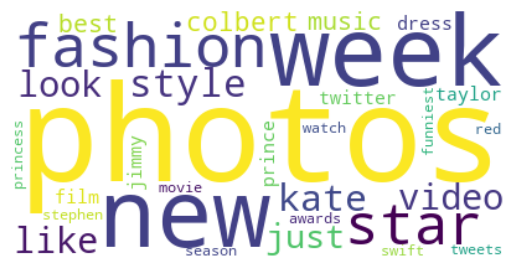

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=0)


In [33]:
df = topic_model.get_document_info(docs)
topic_0_df = df[df['Topic'] == 0]['Document']
topic_0_df.shape

(17751,)

In [35]:
topic0_docs = topic_0_df.to_list()
topic0_docs[:5]

['23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23) [SEP] "Until you have a dog you don\'t understand what could be eaten."',
 'The Funniest Tweets From Parents This Week (Sept. 17-23) [SEP] "Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce."',
 'How A New Documentary Captures The Complexity Of Being A Child Of Immigrants [SEP] In "Mija," director Isabel Castro combined music documentaries with the style of "Euphoria" and "Clueless" to tell a more nuanced immigration story.',
 'Golden Globes Returning To NBC In January After Year Off-Air [SEP] For the past 18 months, Hollywood has effectively boycotted the Globes after reports that the HFPA’s 87 members of non-American journalists included no Black members.',
 '\'French Spider-Man\' Celebrates 60th Birthday With A Massive Skyscraper Climb [SEP] Alain Robert, known as the "French Spider-Man," has climbed the Bu

In [38]:
custom_stop_words = ['sep']
combined_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

vectorizer_model = CountVectorizer(stop_words=combined_stop_words)
representation_model = MaximalMarginalRelevance(diversity = 0.2)
topic0_model = BERTopic(vectorizer_model=vectorizer_model, representation_model=representation_model, nr_topics=10, top_n_words=20, n_gram_range=(1,2))


topics_0, topic0_probs = topic0_model.fit_transform(topic0_docs)
topic0_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1541,-1_prince_photos_kate_royal,"[prince, photos, kate, royal, middleton, princess, duchess, dress, kardashian, kim]","[Kate Middleton Attends Wedding While Nearly Five Months Pregnant (PHOTOS) [SEP] Check out the photos of the Kate Middleton, Prince William and Prince Harry attending the wedding below and see more here, Prince William Plays Polo While World Waits For Royal Baby News (PHOTOS) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. Prince, Royal Fashion, As Seen On Kate Middleton & Prince William, That Just Wasn't Right (PHOTOS) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do]"
1,0,7884,0_fashion_style_taylor_dress,"[fashion, style, taylor, dress, miley, cyrus, beauty, swift, wear, shoes]","[Marc Jacobs Turns 50: A Look Back At The Designer Before He Was An Icon (PHOTO) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do, Out Of Everything We Saw At New York Fashion Week, THIS Is What We Want [SEP] , Jessica Lange Golden Globes Dress 2013: See Her Red Carpet Look! (PHOTO) [SEP] See all of the looks from the 2013 Golden Globes red carpet! Want more? Be sure to check out HuffPost Style on Twitter, Facebook]"
2,1,5003,1_trump_colbert_stephen_donald,"[trump, colbert, stephen, donald, netflix, thrones, host, kimmel, jon, noah]","[Stephen Colbert Does Some Porn Star Math For Michael Cohen And Donald Trump [SEP] The ""Late Show"" host runs the numbers., Stephen Colbert Suggests The Perfect Place For Donald Trump To Testify Under Oath [SEP] It's ""to make sure Trump is honest,"" says Colbert., Stephen Colbert Teases New 'Our Cartoon President' TV Show About Donald Trump [SEP] ""No one is safe.""]"
3,2,1256,2_justin_music_kanye_bieber,"[justin, music, kanye, bieber, rapper, timberlake, beatles, trudeau, spotify, songs]","[Kanye West Still Blames Himself For His Mother's Death [SEP] Kanye West seems to have almost everything; family, fortune and success. But even the rapper has regrets, and believes, Yet Another Lawsuit Against Justin Bieber [SEP] , Kanye West's 'All Day/I Feel Like That' Video Leaked Online Before U.S. Premiere [SEP] Kanye West is premiering his new video in the U.S., but you can already watch it ""all day."" The 9-minute video for ""All]"
4,3,1030,3_disney_princess_kate_royal,"[disney, princess, kate, royal, prince, duchess, toys, harry, disneyland, princesses]","[Kate, Pippa Middleton Join David & Victoria Beckham In Wimbledon Royal Box (PHOTOS) [SEP] Sure, there's a tennis match going on. But all eyes were on the Royal Box at Wimbledon today, which held not only Kate Middleton, Royal Anniversary: 9 Bizarre Items Celebrating Prince William And Kate Middleton's Big Day [SEP] It's hard to believe that it's been almost a year since Prince William and Kate Middleton tied the knot. In honor of the, Kate Middleton's Pregnant, Prince Charles Is Gay & More Juicy Royal Rumors [SEP] Kate Middleton's pregnant, Prince Charles is gay and more...]"
5,4,813,4_funniest_tweets_cat_women,"[funniest, tweets, cat, women, cats, twitter, hilarious, tweet, parenting, moms]","[The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] ]"
6,5,72,5_sniper_neil_patrick_nate,"[sniper, neil, patrick, nate, harris, kyle, parker, sundance, eastwood, director]","[Documents Show 'American Sniper' Chris Kyle Distorted Military Record [SEP] NO AMERICAN HAS been more associated with the Navy SEAL mystique than Chris Kyle, known as the deadliest sniper in military, Will Neil Patrick Harris Be On 'American Horror Story'? [SEP] , Chris Kyle Dead: Author Of 'American Sniper' Shot And Killed At Gun Range [SEP] Chris Kyle, a former Navy SEAL who wrote the best-selling bo

In [39]:
topics_to_merge_0 = [[5,6,7,8]]
topic0_model.merge_topics(topic0_docs, topics_to_merge_0)
topic0_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1541,-1_prince_photos_kate_royal,"[prince, photos, kate, royal, middleton, style, princess, duchess, dress, kardashian]","[Kate Middleton Attends Wedding While Nearly Five Months Pregnant (PHOTOS) [SEP] Check out the photos of the Kate Middleton, Prince William and Prince Harry attending the wedding below and see more here, Prince William Plays Polo While World Waits For Royal Baby News (PHOTOS) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. Prince, Royal Fashion, As Seen On Kate Middleton & Prince William, That Just Wasn't Right (PHOTOS) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do]"
1,0,7884,0_fashion_taylor_dress_miley,"[fashion, taylor, dress, miley, cyrus, photo, beauty, swift, wear, shoes]","[Marc Jacobs Turns 50: A Look Back At The Designer Before He Was An Icon (PHOTO) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do, Out Of Everything We Saw At New York Fashion Week, THIS Is What We Want [SEP] , Jessica Lange Golden Globes Dress 2013: See Her Red Carpet Look! (PHOTO) [SEP] See all of the looks from the 2013 Golden Globes red carpet! Want more? Be sure to check out HuffPost Style on Twitter, Facebook]"
2,1,5003,1_trump_colbert_stephen_jimmy,"[trump, colbert, stephen, jimmy, donald, netflix, thrones, kimmel, office, jon]","[Stephen Colbert Does Some Porn Star Math For Michael Cohen And Donald Trump [SEP] The ""Late Show"" host runs the numbers., Stephen Colbert Suggests The Perfect Place For Donald Trump To Testify Under Oath [SEP] It's ""to make sure Trump is honest,"" says Colbert., Stephen Colbert Teases New 'Our Cartoon President' TV Show About Donald Trump [SEP] ""No one is safe.""]"
3,2,1256,2_justin_music_kanye_bieber,"[justin, music, kanye, bieber, rapper, timberlake, beatles, trudeau, spotify, songs]","[Kanye West Still Blames Himself For His Mother's Death [SEP] Kanye West seems to have almost everything; family, fortune and success. But even the rapper has regrets, and believes, Kanye West's 'All Day/I Feel Like That' Video Leaked Online Before U.S. Premiere [SEP] Kanye West is premiering his new video in the U.S., but you can already watch it ""all day."" The 9-minute video for ""All, Yet Another Lawsuit Against Justin Bieber [SEP] ]"
4,3,1030,3_disney_princess_kate_royal,"[disney, princess, kate, royal, prince, duchess, toys, harry, wedding, disneyland]","[Kate, Pippa Middleton Join David & Victoria Beckham In Wimbledon Royal Box (PHOTOS) [SEP] Sure, there's a tennis match going on. But all eyes were on the Royal Box at Wimbledon today, which held not only Kate Middleton, Kate Middleton's Pregnant, Prince Charles Is Gay & More Juicy Royal Rumors [SEP] Kate Middleton's pregnant, Prince Charles is gay and more..., Royal Anniversary: 9 Bizarre Items Celebrating Prince William And Kate Middleton's Big Day [SEP] It's hard to believe that it's been almost a year since Prince William and Kate Middleton tied the knot. In honor of the]"
5,4,813,4_funniest_tweets_cat_women,"[funniest, tweets, cat, women, cats, twitter, hilarious, tweet, parenting, moms]","[The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] ]"
6,5,224,5_downton_abbey_sniper_challenge,"[downton, abbey, sniper, challenge, bucket, neil, nate, gatsby, brady, kyle]","[Chris Pratt Takes On The Ice Bucket Challenge [SEP] , Meet The Guy Who Made ALS 'Ice Bucket Challenge' Go Viral [SEP] , Athletes Everywhere Take The ALS Ice Bucket Challenge [SEP] ]"


In [43]:
topic0_df = topic0_model.get_document_info(topic0_docs)
topic0_df.head()

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23) [SEP] ""Until you have a dog you don't understand what could be eaten.""",4,4_funniest_tweets_cat_women,"[funniest, tweets, cat, women, cats, twitter, hilarious, tweet, parenting, moms]","[The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] ]",funniest - tweets - cat - women - cats - twitter - hilarious - tweet - parenting - moms,1.000000,False
1,"The Funniest Tweets From Parents This Week (Sept. 17-23) [SEP] ""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",4,4_funniest_tweets_cat_women,"[funniest, tweets, cat, women, cats, twitter, hilarious, tweet, parenting, moms]","[The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] ]",funniest - tweets - cat - women - cats - twitter - hilarious - tweet - parenting - moms,0.055122,False
2,"How A New Documentary Captures The Complexity Of Being A Child Of Immigrants [SEP] In ""Mija,"" director Isabel Castro combined music documentaries with the style of ""Euphoria"" and ""Clueless"" to tell a more nuanced immigration story.",0,0_fashion_taylor_dress_miley,"[fashion, taylor, dress, miley, cyrus, photo, beauty, swift, wear, shoes]","[Marc Jacobs Turns 50: A Look Back At The Designer Before He Was An Icon (PHOTO) [SEP] Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do, Out Of Everything We Saw At New York Fashion Week, THIS Is What We Want [SEP] , Jessica Lange Golden Globes Dress 2013: See Her Red Carpet Look! (PHOTO) [SEP] See all of the looks from the 2013 Golden Globes red carpet! Want more? Be sure to check out HuffPost Style on Twitter, Facebook]",fashion - taylor - dress - miley - cyrus - photo - beauty - swift - wear - shoes,0.140561,False
3,"Golden Globes Returning To NBC In January After Year Off-Air [SEP] For the past 18 months, Hollywood has effectively boycotted the Globes after reports that the HFPA’s 87 members of non-American journalists included no Black members.",1,1_trump_colbert_stephen_jimmy,"[trump, colbert, stephen, jimmy, donald, netflix, thrones, kimmel, office, jon]","[Stephen Colbert Does Some Porn Star Math For Michael Cohen And Donald Trump [SEP] The ""Late Show"" host runs the numbers., Stephen Colbert Suggests The Perfect Place For Donald Trump To Testify Under Oath [SEP] It's ""to make sure Trump is honest,"" says Colbert., Stephen Colbert Teases New 'Our Cartoon President' TV Show About Donald Trump [SEP] ""No one is safe.""]",trump - colbert - stephen - jimmy - donald - netflix - thrones - kimmel - office - jon,0.435313,False
4,"'French Spider-Man' Celebrates 60th Birthday With A Massive Skyscraper Climb [SEP] Alain Robert, known as the ""French Spider-Man,"" has climbed the Burj Khalifa and the Empire State Building.",1,1_trump_colbert_stephen_jimmy,"[trump, colbert, stephen, jimmy, donald, netflix, thrones, kimmel, office, jon]","[Stephen Colbert Does Some Porn Star Math For Michael Cohen And Donald Trump [SEP] The ""Late Show"" host runs the numbers., Stephen Colbert Suggests The Perfect Place For Donald Trump To Testify Under Oath [SEP] It's ""to make sure Trump is honest,"" says Colbert., Stephen Colbert Teases New 'Our Cartoon President' TV Show About Donald Trump [SEP] ""No one is safe.""]",trump - colbert - stephen - jimmy - donald - netflix - thrones - kimmel - office - jon,0.925210,False


### Combining the results from both the models

In [47]:
merged_df = pd.merge(df, topic0_df, on='Document', how='left')
display_with_max_height(merged_df.head(), max_height=500)

,Document,Topic_x,Name_x,Representation_x,Representative_Docs_x,Top_n_words_x,Probability_x,Representative_document_x,Topic_y,Name_y,Representation_y,Representative_Docs_y,Top_n_words_y,Probability_y,Representative_document_y
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters [SEP] Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,-1,-1_new_trump_just_photos,"[new, trump, just, photos, people, like, time, life, day, make, video, dont, world, years, know, want, love, said, best, way, donald, women, says, good, year, kids, need, things, think, look]","[The 10 Most Influential People In Family Life Today [SEP] 1. Moms Don't get us wrong -- dads are a key part of family life, with many more involved in parenting than ever before. But, What Would People Think? [SEP] , January Jones' Casual Style Is Out Of Sync With 'Mad Men' Co-Stars (PHOTOS) [SEP] PHOTOS: Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle]",new - trump - just - photos - people - like - time - life - day - make - video - dont - world - years - know - want - love - said - best - way - donald - women - says - good - year - kids - need - things - think - look,0.000000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video [SEP] He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",17,17_airlines_flight_airline_plane,"[airlines, flight, airline, plane, airport, tsa, space, passengers, air, flying, mars, passenger, flights, airplane, nasa, crash, travel, united, new, airports, planet, video, pilot, jet, seat, planes, delta, fly, fees, travelers]","[Flight Canceled? What To Do When You're Stranded [SEP] A United Airlines flight from China was recently delayed by three days. According to ABC News, the situation was so tense, Ask a Flight Attendant [SEP] What's the best way to annoy a flight attendant? What's the best way to get on a flight attendant's good side? We sat down with a flight attendant at a major passenger airline to learn what it's like being part of the cabin crew., American Airlines Flight Attendant Rants About Plane Crash, Grounds Flight [SEP] According to a report by The Dallas Morning News: ""The flight attendant 'came on the PA system ranting about AA bankruptcy]",airlines - flight - airline - plane - airport - tsa - space - passengers - air - flying - mars - passenger - flights - airplane - nasa - crash - travel - united - new - airports - planet - video - pilot - jet - seat - planes - delta - fly - fees - travelers,1.000000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23) [SEP] ""Until you have a dog you don't understand what could be eaten.""",0,0_photos_week_new_fashion,"[photos, week, new, fashion, star, style, kate, video, look, like, just, colbert, music, best, taylor, prince, twitter, dress, jimmy, film, stephen, awards, funniest, tweets, swift, watch, movie, red, season, princess]","[The 20 Funniest Tweets From Women This Week [SEP] The ladies of Twitter never fail to brighten our days with their brilliant ― but succinct ― wisdom. Each week, HuffPost Women, New York Fashion Week Blisters, Sad Dinners, IPhone Autocorrects And More Tweets Of The Day [SEP] New York Fashion Week is much less glamorous than it seems on TV. In reality, it's hot, there's a lot of running around, shoes, Funniest Parenting Tweets: What Moms And Dads Said On Twitter This Week [SEP] Kids may say the darndest things, but parents tweet about them in the funniest ways. So each week, we round up the most hilarious]",photos - week - new - fashion - star - style - kate - video - look - like - just - colbert - music - best - taylor - prince - twitte

In [66]:
merged_df['Name'] = np.where(merged_df['Topic_x'] == 0, merged_df['Name_y'], merged_df['Name_x'])
merged_df['Representation'] = np.where(merged_df['Topic_x'] == 0, merged_df['Representation_y'], merged_df['Representation_x'])
merged_df['Representative_Docs'] = np.where(merged_df['Topic_x'] == 0, merged_df['Representative_Docs_y'], merged_df['Representative_Docs_x'])
merged_df['Top_n_words'] = np.where(merged_df['Topic_x'] == 0, merged_df['Top_n_words_y'], merged_df['Top_n_words_x'])
merged_df['Probability'] = np.where(merged_df['Topic_x'] == 0, merged_df['Probability_y'], merged_df['Probability_x'])
merged_df['Representative_document'] = np.where(merged_df['Topic_x'] == 0, merged_df['Representative_document_y'], merged_df['Representative_document_x'])
merged_df['Topic'] = np.where(merged_df['Topic_x'] == 0, merged_df['Topic_y'], merged_df['Topic_x'])
merged_df['Topic'] = merged_df['Topic'].astype('int')

### Creating Custom Labels and assigning them correctly

In [67]:
topic_x_labels = {
    0:  "FASHION & MOVIES",1: "US POLITICS",2: "FOOD & DRINK",3: "QUEER VOICES",4: "HEALTH",5: "CRIME",6: "WELLNESS",7: "WORLD POLITICS",8: "PARENTING",9: "SPORTS", 
    10: "DATING & MARRIAGE",11: "HOLIDAYS",12: "ART & HOME",13: "TRAVEL",14: "BUSINESS",15: "TECHNOLOGY",16: "ANIMALS",17: "AIRLINE INCIDENTS",18: "CLIMATE",
    19: "MENTAL HEALTH",20: "EDUCATION",21: "WEATHER NEWS",22: "STYLE",23: "OTHER",24: "OTHER",25: "SCIENCE & HISTORY",26: "WEIRD NEWS",27: "OTHER"
}

topic_y_labels = {
    0:  "FASHION",1: "MOVIES",2: "MUSIC",3: "ROYAL FAMILY",4: "FUNNY TWEETS",5: "OTHER"
}

In [73]:
merged_df['Topic_Label_x'] = merged_df['Topic_x'].map(topic_x_labels)
merged_df['Topic_Label_y'] = merged_df['Topic_y'].map(topic_y_labels)
display_with_max_height(merged_df.head(), max_height=500)

,Document,Topic_x,Name_x,Representation_x,Representative_Docs_x,Top_n_words_x,Probability_x,Representative_document_x,Topic_y,Name_y,Representation_y,Representative_Docs_y,Top_n_words_y,Probability_y,Representative_document_y,Topic_No,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document,Topic_Label_x,Topic_Label_y,Topic_Label
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters [SEP] Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,-1,-1_new_trump_just_photos,"[new, trump, just, photos, people, like, time, life, day, make, video, dont, world, years, know, want, love, said, best, way, donald, women, says, good, year, kids, need, things, think, look]","[The 10 Most Influential People In Family Life Today [SEP] 1. Moms Don't get us wrong -- dads are a key part of family life, with many more involved in parenting than ever before. But, What Would People Think? [SEP] , January Jones' Casual Style Is Out Of Sync With 'Mad Men' Co-Stars (PHOTOS) [SEP] PHOTOS: Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle]",new - trump - just - photos - people - like - time - life - day - make - video - dont - world - years - know - want - love - said - best - way - donald - women - says - good - year - kids - need - things - think - look,0.000000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1,-1_new_trump_just_photos,"[new, trump, just, photos, people, like, time, life, day, make, video, dont, world, years, know, want, love, said, best, way, donald, women, says, good, year, kids, need, things, think, look]","[The 10 Most Influential People In Family Life Today [SEP] 1. Moms Don't get us wrong -- dads are a key part of family life, with many more involved in parenting than ever before. But, What Would People Think? [SEP] , January Jones' Casual Style Is Out Of Sync With 'Mad Men' Co-Stars (PHOTOS) [SEP] PHOTOS: Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle]",new - trump - just - photos - people - like - time - life - day - make - video - dont - world - years - know - want - love - said - best - way - donald - women - says - good - year - kids - need - things - think - look,0.000000,False,NaN,NaN,Unknown
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video [SEP] He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",17,17_airlines_flight_airline_plane,"[airlines, flight, airline, plane, airport, tsa, space, passengers, air, flying, mars, passenger, flights, airplane, nasa, crash, travel, united, new, airports, planet, video, pilot, jet, seat, planes, delta, fly, fees, travelers]","[Flight Canceled? What To Do When You're Stranded [SEP] A United Airlines flight from China was recently delayed by three days. According to ABC News, the situation was so tense, Ask a Flight Attendant [SEP] What's the best way to annoy a flight attendant? What's the best way to get on a flight attendant's good side? We sat down with a flight attendant at a major passenger airline to learn what it's like being part of the cabin crew., American Airlines Flight Attendant Rants About Plane Crash, Grounds Flight [SEP] According to a report by The Dallas Morning News: ""The flight attendant 'came on the PA system ranting about AA bankruptcy]",airlines - flight - airline - plane - airport - tsa - space - passengers - air - flying - mars - passenger - flights - airplane - nasa - crash - travel - united - new - airports - planet - video - pilot - jet - seat - planes - delta - fly - fees - travelers,1.000000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17,17_airlines_flight_airline_plane,"[airlines, flight, airline, plane, airport, tsa, sp

In [74]:
merged_df['Topic_Label_x'] = merged_df['Topic_Label_x'].fillna('Unknown')
merged_df['Topic_Label_y'] = merged_df['Topic_Label_y'].fillna('Unknown')
merged_df['Topic_Label'] = np.where(merged_df['Topic_x'] == 0, merged_df['Topic_Label_y'], merged_df['Topic_Label_x'])

In [80]:
final_df = merged_df[['Document', 'Topic', 'Topic_Label', 'Name', 'Representation', 'Representative_Docs', 'Top_n_words', 'Probability', 'Representative_document']]
final_df.head()

,Document,Topic,Topic_Label,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters [SEP] Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,-1,Unknown,-1_new_trump_just_photos,"[new, trump, just, photos, people, like, time, life, day, make, video, dont, world, years, know, want, love, said, best, way, donald, women, says, good, year, kids, need, things, think, look]","[The 10 Most Influential People In Family Life Today [SEP] 1. Moms Don't get us wrong -- dads are a key part of family life, with many more involved in parenting than ever before. But, What Would People Think? [SEP] , January Jones' Casual Style Is Out Of Sync With 'Mad Men' Co-Stars (PHOTOS) [SEP] PHOTOS: Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle]",new - trump - just - photos - people - like - time - life - day - make - video - dont - world - years - know - want - love - said - best - way - donald - women - says - good - year - kids - need - things - think - look,0.000000,False
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video [SEP] He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",17,AIRLINE INCIDENTS,17_airlines_flight_airline_plane,"[airlines, flight, airline, plane, airport, tsa, space, passengers, air, flying, mars, passenger, flights, airplane, nasa, crash, travel, united, new, airports, planet, video, pilot, jet, seat, planes, delta, fly, fees, travelers]","[Flight Canceled? What To Do When You're Stranded [SEP] A United Airlines flight from China was recently delayed by three days. According to ABC News, the situation was so tense, Ask a Flight Attendant [SEP] What's the best way to annoy a flight attendant? What's the best way to get on a flight attendant's good side? We sat down with a flight attendant at a major passenger airline to learn what it's like being part of the cabin crew., American Airlines Flight Attendant Rants About Plane Crash, Grounds Flight [SEP] According to a report by The Dallas Morning News: ""The flight attendant 'came on the PA system ranting about AA bankruptcy]",airlines - flight - airline - plane - airport - tsa - space - passengers - air - flying - mars - passenger - flights - airplane - nasa - crash - travel - united - new - airports - planet - video - pilot - jet - seat - planes - delta - fly - fees - travelers,1.000000,False
2,"23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23) [SEP] ""Until you have a dog you don't understand what could be eaten.""",4,FUNNY TWEETS,4_funniest_tweets_cat_women,"[funniest, tweets, cat, women, cats, twitter, hilarious, tweet, parenting, moms]","[The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] ]",funniest - tweets - cat - women - cats - twitter - hilarious - tweet - parenting - moms,1.000000,False
3,"The Funniest Tweets From Parents This Week (Sept. 17-23) [SEP] ""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",4,FUNNY TWEETS,4_funniest_tweets_cat_women,"[funniest, tweets, cat, women, cats, twitter, hilarious, tweet, parenting, moms]","[The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] ]",funniest - tweets - cat - women - cats - twitter - hilarious - tweet - parenting - moms,0.055122,False
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer [SEP] Amy Cooper accused investment firm Franklin Templeton of unfair

### Final Data to Feed Into Supervised Model - High Confidence labels (Prob > 0.7)

In [86]:
input_source_df = final_df[final_df['Probability'] > 0.7]
input_source_df.shape

(73985, 9)

In [89]:
input_source_df.head()

,Document,Topic,Topic_Label,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video [SEP] He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",17,AIRLINE INCIDENTS,17_airlines_flight_airline_plane,"[airlines, flight, airline, plane, airport, tsa, space, passengers, air, flying, mars, passenger, flights, airplane, nasa, crash, travel, united, new, airports, planet, video, pilot, jet, seat, planes, delta, fly, fees, travelers]","[Flight Canceled? What To Do When You're Stranded [SEP] A United Airlines flight from China was recently delayed by three days. According to ABC News, the situation was so tense, Ask a Flight Attendant [SEP] What's the best way to annoy a flight attendant? What's the best way to get on a flight attendant's good side? We sat down with a flight attendant at a major passenger airline to learn what it's like being part of the cabin crew., American Airlines Flight Attendant Rants About Plane Crash, Grounds Flight [SEP] According to a report by The Dallas Morning News: ""The flight attendant 'came on the PA system ranting about AA bankruptcy]",airlines - flight - airline - plane - airport - tsa - space - passengers - air - flying - mars - passenger - flights - airplane - nasa - crash - travel - united - new - airports - planet - video - pilot - jet - seat - planes - delta - fly - fees - travelers,1.000000,False
2,"23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23) [SEP] ""Until you have a dog you don't understand what could be eaten.""",4,FUNNY TWEETS,4_funniest_tweets_cat_women,"[funniest, tweets, cat, women, cats, twitter, hilarious, tweet, parenting, moms]","[The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] , The Funniest Tweets From Women This Week [SEP] ]",funniest - tweets - cat - women - cats - twitter - hilarious - tweet - parenting - moms,1.000000,False
11,"Man Sets Himself On Fire In Apparent Protest Of Funeral For Japan's Abe [SEP] The incident underscores a growing wave of protests against the funeral for Shinzo Abe, who was one of the most divisive leaders in postwar Japanese politics.",11,HOLIDAYS,11_halloween_holiday_veterans_holidays,"[halloween, holiday, veterans, holidays, christmas, day, year, july, season, time, ski, war, easter, santa, costumes, winter, new, memorial, spring, photos, years, world, just, candy, week, cold, costume, home, pumpkin, celebrate]","[Happy Halloween from the Past! [SEP] , Trump Launches The 'War On Christmas' In July [SEP] Is it that time of year already?, Halloween Costume Ideas For Kids And Babies 2012: Great Ideas For Children (PHOTOS) [SEP] Halloween is approaching and it's time to settle on that perfect Halloween costume idea for your baby. If you have a big]",halloween - holiday - veterans - holidays - christmas - day - year - july - season - time - ski - war - easter - santa - costumes - winter - new - memorial - spring - photos - years - world - just - candy - week - cold - costume - home - pumpkin - celebrate,0.879400,False
15,"Russian Cosmonaut Valery Polyakov Who Broke Record With 437-Day Stay In Space Dies At 80 [SEP] Polyakov's record-breaking trip to outer space saw him orbit Earth 7,075 times and travel nearly 187 million miles.",17,AIRLINE INCIDENTS,17_airlines_flight_airline_plane,"[airlines, flight, airline, plane, airport, tsa, space, passengers, air, flying, mars, passenger, flights, airplane, nasa, crash, travel, united, new, airports, planet, video, pilot, jet, seat, planes, delta, fly, fees, travelers]","[Flight Canceled? What To Do When You're Stranded [SEP] A United Airlines flight from China was recently delayed by three days. According to ABC News, the situation was so tense, Ask a Flight Attendant [SEP] What's the best way to annoy a flight at

In [90]:
input_df = input_source_df[['Document', 'Topic_Label']]
input_df.head()

,Document,Topic_Label
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video [SEP] He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",AIRLINE INCIDENTS
2,"23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23) [SEP] ""Until you have a dog you don't understand what could be eaten.""",FUNNY TWEETS
11,"Man Sets Himself On Fire In Apparent Protest Of Funeral For Japan's Abe [SEP] The incident underscores a growing wave of protests against the funeral for Shinzo Abe, who was one of the most divisive leaders in postwar Japanese politics.",HOLIDAYS
15,"Russian Cosmonaut Valery Polyakov Who Broke Record With 437-Day Stay In Space Dies At 80 [SEP] Polyakov's record-breaking trip to outer space saw him orbit Earth 7,075 times and travel nearly 187 million miles.",AIRLINE INCIDENTS
18,4 Russian-Controlled Ukrainian Regions Schedule Votes This Week To Join Russia [SEP] The concerted and quickening Kremlin-backed efforts to swallow up four regions could set the stage for Moscow to escalate the war.,WORLD POLITICS


In [91]:
input_df['Topic_Label'].value_counts()

Topic_Label
US POLITICS          10128
FASHION               5284
QUEER VOICES          5229
FOOD & DRINK          5012
CRIME                 3915
FUNNY TWEETS          3837
WELLNESS              3667
PARENTING             3410
HEALTH                3399
WORLD POLITICS        3334
MOVIES                3060
SPORTS                2755
ART & HOME            2404
DATING & MARRIAGE     2156
TRAVEL                1961
HOLIDAYS              1911
BUSINESS              1848
AIRLINE INCIDENTS     1728
ANIMALS               1590
TECHNOLOGY            1390
CLIMATE                916
MENTAL HEALTH          744
OTHER                  738
EDUCATION              707
MUSIC                  688
WEATHER NEWS           686
STYLE                  584
ROYAL FAMILY           575
SCIENCE & HISTORY      220
WEIRD NEWS             109
Name: count, dtype: int64

In [102]:
input_df.to_csv('supervised_input.csv', index=False)